## Project 3: Newton roots

#### Archana Mohan

**Introduction:**

The project deals with visualizing and seeking patterns of the newton's method of finding roots, applied in functions of the form $z^n - 1$ where n is an integer. Newton's method attempts to figure out the roots of functions using the derivative of the function and an initial guess of the root. 
<br/> `The newton method of root finding` is as follows:
<br/>Consider a function $f(x)$ and an initial guess of the root of $f(x)$ to be $x_0$. Then, newton's method produces the next guess of the root as: $$x_{n+1} = x_n - \frac{f(x_n)}{f^\prime(x_n)} \text{ where }n\geq 0.$$
<br/>We continue this calculation until the difference between the consecutive newton roots becomes negligible. This can be interpreted as $|{x_{n+1} - x_n|}$ is less than a certain tolerance limit close to zero. For this project's purposes, we'll be using a default value of 0.001 as our tolerance limit. However, the code is designed in such a manner that the user can change this value as needed. 
<br/>Essentially, what the newton's method does is to draw a tangent of the function at the point of our initial guess $x_0$ and then extrapolate this tangent line until it intersects with the x-axis ($y=0$). This point of intersection would then become our next guess $x_1$ and we continue this till we observe convergence. 
<br/>
<br/>In this work, we also utilize the theory of `nth roots of unity`. For functions of the form $z^n - 1$ where $n$ is an integer, there roots are given by the formula $$z = \cos{\frac{2\pi k}{n}}+i\sin{\frac{2\pi k}{n}}\ ; k =0,1,...(n-1).$$ 
<br/>
<br/>*Goal of the project:*
<br/>Here, we'll loop the newton's root method on a range of initial guess for certain functions and look for patterns on how it converges to the actual roots. These patterns are obtained by plotting initial guesses and the roots they converge to in a color segregated display graph.

**The Project:**
<br/>This work consists of three parts.
<br/>Part 1 consists of a function - `newton()` which will help us find the next newton root guess of a given polynomial, and then we'll plot the newton method for the polynomial on a graph to observe. 
<br/>Part 2 deals with plotting the newton function on a loop of polynomial $z^3 - 1$ and explaining any observed behaviors.
<br/>Finally, part 3 is where we observe and analyze the convergence of newton roots in two more functions: $z^5 -1 \text{ and }z^8-1$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

**PART 1**

**newton( ) function:**
<br/>The first function in this work, `newton()`, is created to find out the next newton root from an initial guess of the root. It takes a function `f`, its derivative `fp`, an initial guess `x0`. Then, computes and returns the next root `x` using the formula $x = x0 - \frac{f(x0)}{fp(x0)}$. This is the function that we'll be using throughout to generate newton root convergence plots of given functions.

In [2]:
def newton(f,fp,x0):
   
    '''Given a function, its derivative, and an initial guess, the function
    returns the first iteration of Newton.''' # docstring
    
    x=x0-(f(x0)/fp(x0)) # newton root equation to find the next root
            
    return x

Next, we define the first polynomial `f1(t)` for which we'll be plotting the newton convergence and its derivative `fp1(t)`. 
<br/>$\textit{f1(t) }= t^3-7t^2+12t$
<br/>$\textit{fp1(t) }= 3t^2-14t+12$

In [3]:
def f1(t):
    fn=t**3-7*(t**2)+12*t
    return fn


def fp1(t):
    der = 3*(t**2)-14*t+12
    return der

Provided below is a demonstration of newton function on the function `f1(t)`. 

In [4]:
newton(f1,fp1,1) 

-5.0

When performing the newton function on `f1(t)` with an initial guess of 1, we get the next iteration as -5.

In the next part, we'll loop the newton function on a range of 100 integers and obtain a convergence plot. For the purpose, we'll use the `linspace()` function in numpy to return an array of 100 numbers between the integers -2 and 8. 

In [5]:
x = np.linspace(-2,8,100) # defining the x axis as the range of 100 numbers between -2 and 8
x0=x.copy() # creating a copy so we're not modifying the x values when plotting

for k in range(101): # define the loop to perform the newton function
    xi = newton(f1,fp1,x)
    x = xi 

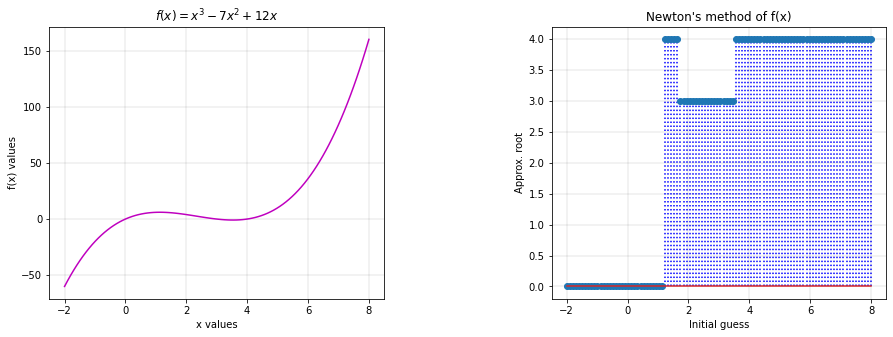

In [6]:
# generating subplots of the function and the newton convergence plot 
plt.figure(figsize=(15,5))
plt.subplots_adjust(wspace=0.5,hspace=1.0)

# first subplot for the entered function 
plt.subplot(1,2,1) # defining the position of the plot
plt.grid(color='k', ls='-', lw=0.1)
plt.plot(x0,f1(x0),'m-') 
plt.title(r'$f(x) = x^3 - 7x^2+12x$')
plt.xlabel("x values")
plt.ylabel("f(x) values")

# second subplot shows the newton's convergence graph for f(x)
plt.subplot(1,2,2)
plt.grid(color='k', ls='-', lw=0.1)
plt.stem(x0,xi,'b:') # plot with 100 numbers in [-2,8] in x axis and respective 100th newton iteration on y-axis
plt.title("Newton's method of f(x)")
plt.xlabel("Initial guess")
plt.ylabel("Approx. root")

plt.show()

From the newton convergence plot of the given function, we observe the 100 points in $[-2,8]$ converge to three specific points in the y-axis - `0,3,4`. Expectedly, 0,3, and 4 are the roots of f(x), showcasing the effectiveness of the newton root method. The convergence of the roots seem to shift at x values that are closer to the local maxima and local minimas of f(x). This could be a consequence of division by 0 in the newton equation as at these points f'(x) = 0 and the shift in direction of tangent lines drawn closer to these extrema points. 

**PART 2**

In this section, we'll work exclusively on plotting and examining newton root convergence plots of the function $z^3 - 1$. We'll define `f3(z)` that'll return the required function and `fp3(z)` that'll return the derivative of f3: $3z^2$. `f3(z)` is a function with complex roots. Hence, it's required that we work on a complex plane to realize the newton method of this function. Moving forward, we'll work with arrays in the numpy library to achieve the desired results. 

In [7]:
# defining the polynomial and its derivative
def f3(z):
    f_3 = z**3-1
    return f_3


def fp3(z):
    fp_3 = 3*(z**2)
    return fp_3

Before we delve into the root convergence, we'll have to find out the actual roots of `f3(z)` using the `nth roots of unity` formula. So, we define a function `root_theory(n)`. Given the order of the polynomial `n`, `root_theory(n)` will return a list containing all the $n$ actual roots of $z^n - 1$.

In [8]:
# Finding theoretical roots
def root_theory(n):
    t_root = [] # define empty list to store the roots
    
   
    for kt in range(0,n): # k ranges from 0 to n-1
        p = (2*np.pi*kt)/n 

        zt = complex(np.cos(p),np.sin(p)) # the formula for nth root of unity
        
        t_root.append(zt) # adding the roots to the list t_root
    
    return t_root

Shown below is an example of the `root_theory(n)` for the polynomial $z^3-1.$ It returns the three actual roots of `f3(z)`.

In [9]:
print(root_theory(3))

[(1+0j), (-0.4999999999999998+0.8660254037844388j), (-0.5000000000000004-0.8660254037844384j)]


**find_roots( ) function:**

The `find_roots()` function defined here is the crux of this project, returning an array indicating the behavior of newton roots of $z^n-1$. It takes in `f` and `fp`, the desired function and its derivative respectively; `n`, the order of our polynomial. It has default values of iteration number `it` set to 100, domain of our complex plane `dom` set to $[-2-2i,2+2i]$, precision factor `tol` of 0.001, and size of the array `nm` returned equaling $1000 \times 1000$. Although these are default values, they can be modified when the function is called if needed.
<br/>
<br/>In this function, we first create the square matrix for the domain using the `meshgrid()` function in numpy. Then, we make a copy of that domain array to perform our newton function on and iterate it upto `it` times. This will create an $nm \times nm $ sized array of all the newton root convergence values of the function. Finally, with the help of `boolean indices` and the previous function `root_theory(n)`, we'll return another $nm \times nm$ array that is entirely made up of the numbers from i = 1,2..,n where each number corresponds to the $i^{th}$ actual root that it converges to. This is achieved using the condition that a newton value $x$ is supposed to converge to a root $r$ if $|x - r| < tol.$

In [10]:
def find_roots(f,fp,n,it=100,dom=[-2,2,-2,2],tol=0.001,nm=1000):
    
    rmin,rmax,imin,imax = dom # setting values for the minimum and maximums for the domain
    
    x = np.linspace(rmin,rmax,nm) # defining the real parts of our complex domain interval
    y = np.linspace(complex(0,imin),complex(0,imax),nm) # defining the imaginary part of our complex domain interval
    xx,yy = np.meshgrid(x,y) # creating real and imaginary arrays of size nm x nm 
    z = xx + yy # combining them together to provide the domain array 
    
    x_0=z.copy() # making a copy to modify and perform the newton function on
          
    # iterating newton on a loop 'it' times
    for k in range(it+1): 

        x1 = newton(f,fp,x_0)
        x_0 = x1

    tlist = root_theory(n) # defining the list of theoretical roots 
    zoo = np.zeros((nm,nm)) # defining a array of zeroes to use boolean indices 
    
    for rz in range(1,n+1): # the loop of root position from 1 to n
   
        b = np.abs(x1-tlist[rz-1]) < tol # conditional statement
        zoo[b] = rz      # creating the required array of 1 to n based on convergence
  
    return zoo

The array of $1,..,n$ numbers returned by the `find_roots()` function is then plotted for $z^3-1$ using `imshow()`. Each number in the array is plotted with a different color; information shown by the colorbar on the right side.

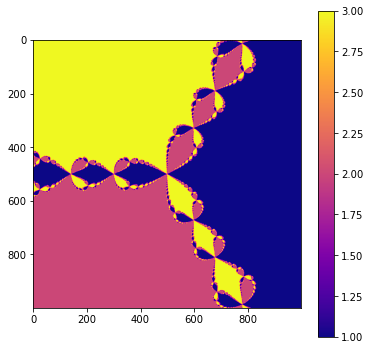

In [11]:
plt.figure(figsize=(6,6))
plt.imshow(find_roots(f3,fp3,3),cmap='plasma')
plt.colorbar()
plt.show()

As seen above, we obtain an image of a three-sectioned area, separated by uniquely shaped curves. It is clear that these three monochromatic sections corresponds to the newton values that are closer to the actual roots. It can also be inferred that first root of $z^3-1$ ($1$) is located somewhere in the dark blue region, the second one ($-0.5 + i8.66$) is in the deep pink region, and the third ($-0.5 - i8.66$) is in the yellow region. However, the most interesting parts of this plot lies in the unevenly shaped curves separating these three areas. So, we'll take a closer look at them.

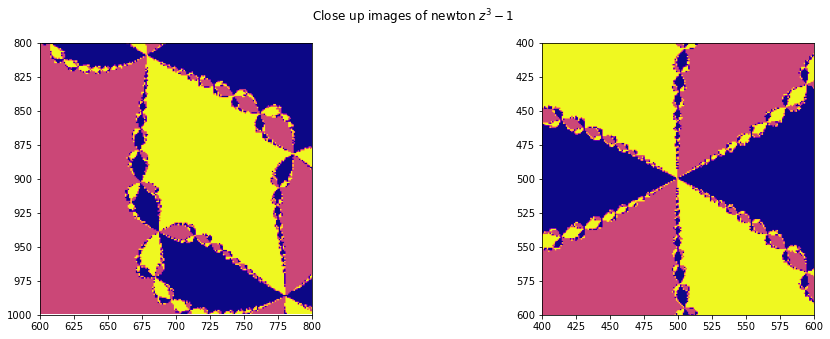

In [12]:
plt.figure(figsize=(15,5))
plt.suptitle(r'Close up images of newton $z^3-1$')
plt.subplots_adjust(wspace=0.5,hspace=1.0)

plt.subplot(1,2,1)
plt.imshow(find_roots(f3,fp3,3),cmap='plasma')
plt.xlim(600,800)
plt.ylim(1000,800)

plt.subplot(1,2,2)
plt.imshow(find_roots(f3,fp3,3),cmap='plasma')
plt.xlim(400,600)
plt.ylim(600,400)
plt.show()

In the first zoomed in image, we see that each uneven curve form more of these multicolored, uneven boundaries within themselves. Also, one side of the boundary is formed primarily of deep pink color while the other side of the boundary is of deep blue color. However, the inside is yellow in color. This observation of the droplet shaped figures formed by three colors and never the same color appearing on the boundaries and the insides together is furthur proven by the second zoomed in image. It also feels as if the boundaries of these new droplets are made up of even more droplets, appearing like these go on forever. However, the image gets more pixelated with zooming in more, making it difficult to furthur check the last observation. These boundaries make up points that are not close to the roots. 

**PART 3**

In this section, we'll develop similar convergence plots as before for the functions $z^5 - 1$ and $z^8 - 1$.

In [13]:
# defining the required functions and their derivatives
def f5(x):
    f_5 = x**5-1
    return f_5


def fp5(x):
    fp_5 = 5*(x**4)
    return fp_5

def f8(x):
    f_8 = x**8-1
    return f_8


def fp8(x):
    fp_8 = 8*(x**7)
    return fp_8

Provided below are the newton convergence plots of the two functions:

$z^5 - 1$:

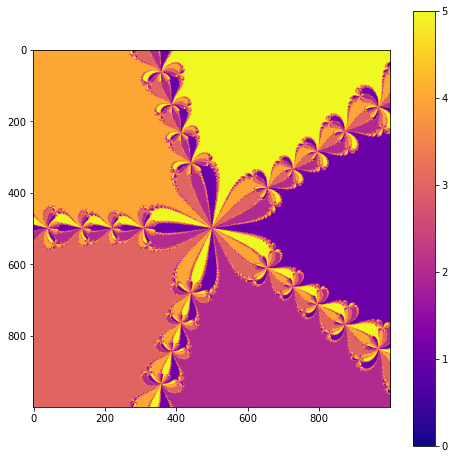

In [14]:
plt.figure(figsize=(8,8))
plt.imshow(find_roots(f5,fp5,5),cmap='plasma')
plt.colorbar()
plt.show()

For the polynomial of order 5, we obtain a 5 sectioned figure with similar droplet, almost heart shaped boundaries. Like the previous function, we can conlude that each monochromatic section corresponds to the area close to the actual roots of the polynomial. The largest droplets seem to exist on the center of the figure, possibly because this is the region comprised of newton values that are much afar from any of the roots. Furthermore, each long boundary is made up of droplets with the same color sequence.

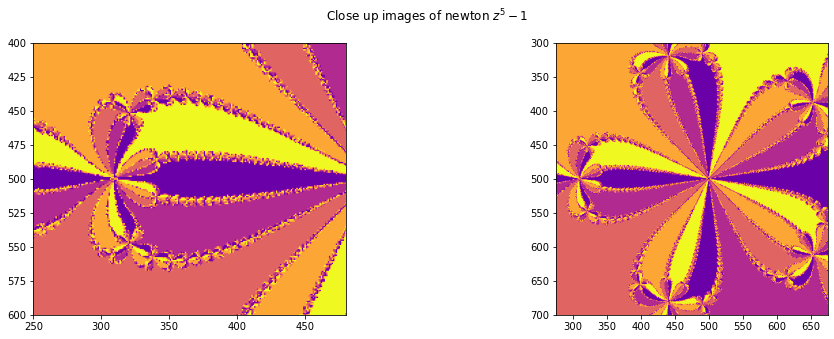

In [15]:
plt.figure(figsize=(15,5))
plt.suptitle(r'Close up images of newton $z^5-1$')
plt.subplots_adjust(wspace=0.5,hspace=1.0)

plt.subplot(1,2,1)
plt.imshow(find_roots(f5,fp5,5),cmap='plasma')
plt.xlim(250,480)
plt.ylim(600,400)

plt.subplot(1,2,2)
plt.imshow(find_roots(f5,fp5,5),cmap='plasma')
plt.xlim(275,675)
plt.ylim(700,300)
plt.show()

In the 5-th order polynomial situation, each singular droplet is furthur divided into $5-2=3$ moochrome sections of different colors. Their boundaries are also made up by even more series of droplets.

$z^8 - 1$:

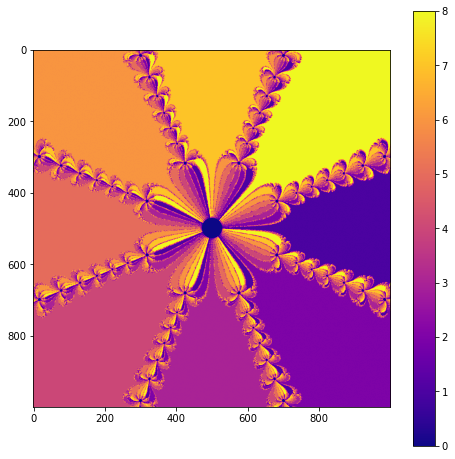

In [16]:
plt.figure(figsize=(8,8))
plt.imshow(find_roots(f8,fp8,8),cmap='plasma')
plt.colorbar()
plt.show()

Now, we're observing a pattern of the number of sections in a newton convergence plot. The polynomial of the 8-th ordered is divided into 8 sections of monochrome regions. Since the monochrome regions each correspond to the roots of the polynomial, we can conclude that for any polynomial $z^n - 1$ - the newton convergence plot of it will be made of $n$ subsections, marked by $n$ primary boundaries.

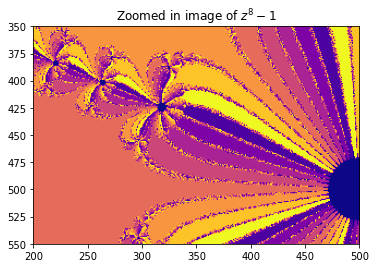

In [17]:
plt.imshow(find_roots(f8,fp8,8),cmap='plasma')
plt.title(r'Zoomed in image of $z^8 - 1$')
plt.xlim(200,500)
plt.ylim(550,350)
plt.show()

Each droplet of $z^8-1$ is made up of $8-2 = 6$ subsections. Expectedly, the two roots that are surrounding the droplet is absent inside it. A noticeable feature of this plot is the big deep violet circle in the center which corresponds to the number 0 in the colorbar. This implies that the numbers in this particular region are so far from any of the 8 roots that they do not converge even with 100 iterations of newton. We can possibly expect the size of the central circle (areas of number 0) to increase with increase in the order of the polynomial (n) and/or if we decrease the precision factor (tol). 

**Conclusion:**

The procedure behind newton's method of root finding - extrapolating tangent lines of an initial guessed root point to the x-axis and then continuing it - results in interesting phenomena. It is seen in color segmented graphs obtained from plotting the convergence of newton values for the function $z^n - 1$. Using three examples, we were able to infer that the image was segmented into $n$ monochrome parts, each part corresponding to the area with and surrounding one of the roots. The boundaries around these sections where made up of droplet like curves which where furthur divided into $n - 2$ monochrome subsections, made up of the roots that are not enveloping it. These boundaries seem to keep going. As $n$ goes up and/or as $tol$ goes down, the area of the central region of number 0 (comprising points far from any root) increases.

****